# GitHub API REST v3 -> 貢献者の特徴
ここではコントリビュート（貢献度）のばらつきを確認します。

## リポジトリの確認と指定方法
例えば以下の条件で調べると, microsoft/vscodeと出てきます。
- microsoft -> owner
- vscode -> repo

https://github.com/search?q=vscode 

In [25]:
# input values
owner = "microsoft"
repo = "vscode"

print("[owner]{0} [repo]{1}について出力します。".format(owner, repo))

[owner]microsoft [repo]vscodeについて出力します。


## ライブラリのインポート

In [26]:
# Libraries
import requests
import json
import pprint
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

## original Libraries
import config_manager as cnf
import github_api.github_api_manager as gapi

## ユーザー情報の取得
- ユーザー名とパスワードを取得します。
- ユーザー情報は、config\setting.cnfに設定します。

In [27]:
# load config file
cnf_data = cnf.confg_manager()
cnf_data.load()
username, userpassword = cnf_data.get_userparam()

# create github api object
gapi_ctrl = gapi.github_api_manager(username, userpassword)

## GitHub APIを叩いてCommit数を取得

このページに表示される総コミット数と微妙に数値が異なる
https://github.com/microsoft/vscode

どうやら
https://docs.github.com/en/rest/reference/repos#statistics
によるとマージコミットと空のコミットは除外されるらしい。

In [49]:

# create contribute stats api
github_api = "/repos/{owner}/{repo}/stats/contributors" \
    .replace("{owner}", owner).replace("{repo}", repo)

ret_json = gapi_ctrl.get_json(github_api)

# create Empty dataframe
df = pd.DataFrame(index=[], columns=ret_json[0].keys())

# apend data
for k in ret_json:
    df = df.append(pd.DataFrame.from_dict(k, orient='index').T)

print("総コミット数 : {0}".format( df.total.astype(int).sum()))

GET https://api.github.com/repos/microsoft/vscode/stats/contributors
総コミット数 : 60954


## 値のキャストを行います
- ざっくり情報を見ておきます

In [5]:
# cast int
df['contributions'] = df['contributions'].astype(float)

# information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 0
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   login                401 non-null    object 
 1   id                   401 non-null    object 
 2   node_id              401 non-null    object 
 3   avatar_url           401 non-null    object 
 4   gravatar_id          401 non-null    object 
 5   url                  401 non-null    object 
 6   html_url             401 non-null    object 
 7   followers_url        401 non-null    object 
 8   following_url        401 non-null    object 
 9   gists_url            401 non-null    object 
 10  starred_url          401 non-null    object 
 11  subscriptions_url    401 non-null    object 
 12  organizations_url    401 non-null    object 
 13  repos_url            401 non-null    object 
 14  events_url           401 non-null    object 
 15  received_events_url  401 non-null    objec

In [36]:
if(len(df) > 0):
    ret_json = gapi_ctrl.get_json_url(df.iloc[0,:]['url'])
    # create Empty dataframe
    df2 = pd.DataFrame(index=[], columns=ret_json.keys())

    for x in df['url']:
        # access github api
        ret_json = gapi_ctrl.get_json_url(x)
        # apend data
        df2 = df2.append(pd.DataFrame.from_dict(ret_json, orient='index').T)

GET https://api.github.com/users/bpasero


# Contributorsをヒストグラムで表示します
偏りすぎていてよくわかりません。

(array([353.,   8.,  12.,   6.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,
          2.,   0.,   2.,   0.,   0.,   2.,   2.,   4.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   0.,   0.,   2.]),
 array([2.00000000e+00, 2.87266667e+02, 5.72533333e+02, 8.57800000e+02,
        1.14306667e+03, 1.42833333e+03, 1.71360000e+03, 1.99886667e+03,
        2.28413333e+03, 2.56940000e+03, 2.85466667e+03, 3.13993333e+03,
        3.42520000e+03, 3.71046667e+03, 3.99573333e+03, 4.28100000e+03,
        4.56626667e+03, 4.85153333e+03, 5.13680000e+03, 5.42206667e+03,
        5.70733333e+03, 5.99260000e+03, 6.27786667e+03, 6.56313333e+03,
        6.84840000e+03, 7.13366667e+03, 7.41893333e+03, 7.70420000e+03,
        7.98946667e+03, 8.27473333e+03, 8.56000000e+03]),
 <a list of 30 Patch objects>)

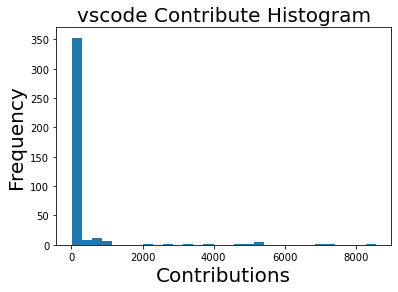

In [7]:

plt.title("{0} Contribute Histogram".format(repo), fontsize=20)  # title
plt.xlabel("Contributions", fontsize=20)            # x-axis label
plt.ylabel("Frequency", fontsize=20)      # y-axis label

# show histogram bins=30
plt.hist(df.contributions, bins=30)

# 対数変換をかけてヒストグラム表示します
ばらつきが見やすくなりました。

(array([36., 73., 56., 59., 27., 21., 22., 12., 10., 10.,  6.,  2.,  4.,
         5.,  4.,  2.,  2.,  2.,  6.,  2.,  4., 10.,  4.,  0.,  2.,  2.,
         2.,  4.,  6.,  6.]),
 array([ 1.        ,  1.40211317,  1.80422634,  2.20633951,  2.60845268,
         3.01056585,  3.41267902,  3.81479219,  4.21690536,  4.61901852,
         5.02113169,  5.42324486,  5.82535803,  6.2274712 ,  6.62958437,
         7.03169754,  7.43381071,  7.83592388,  8.23803705,  8.64015022,
         9.04226339,  9.44437656,  9.84648973, 10.2486029 , 10.65071607,
        11.05282923, 11.4549424 , 11.85705557, 12.25916874, 12.66128191,
        13.06339508]),
 <a list of 30 Patch objects>)

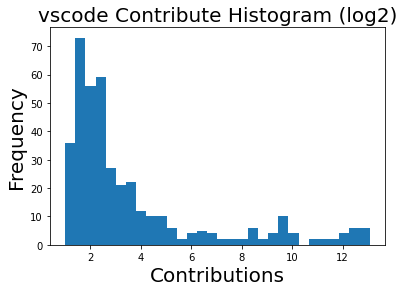

In [8]:
plt.title("{0} Contribute Histogram (log2)".format(repo), fontsize=20)  # title
plt.xlabel("Contributions", fontsize=20)            # x-axis label
plt.ylabel("Frequency", fontsize=20)      # y-axis label
# show histogram for log2 bins=30
plt.hist(np.log2(df.contributions), bins=30)